In [44]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [45]:
train_data=pd.read_csv('Train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
null=train_data.isnull()
(null/len(train_data)).sum()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [47]:
pandas_profiling.ProfileReport(train_data)

Number of variables,12
Number of observations,8523
Total Missing (%),3.8%
Total size in memory,799.1 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Filling the missing values with mean and mode

In [4]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
Item_Weight_mean=train_data['Item_Weight'].mean()
train_data['Item_Weight'].fillna(Item_Weight_mean,inplace=True)
Outlet_Size_mode=train_data['Outlet_Size'].mode()
train_data['Outlet_Size'].fillna(Outlet_Size_mode[0],inplace=True) #replace nan with 0
miss=train_data.isnull().sum()
(miss/len(train_data))*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

- Choosing the appropriate columns to perform on the train model


In [6]:
drp=train_data[[
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']]

In [7]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [8]:
map1={'Meat':'Food','Snack Foods':'Food', 'Frozen Foods':'Food','Breakfast':'Food','Breads':'Food', 'Starchy Foods':'Food',
      'Seafood':'Food','Fruits and Vegetables':'Food',
      'Dairy': 'Drinks','Soft Drinks': 'Drinks','Hard Drinks': 'Drinks',
      'Household':'Others','Baking Goods':'Others','Health and Hygiene':'Others','Canned':'Others','Others':'Others'}

drp['Item_Type']=drp['Item_Type'].replace({'Meat':'Food','Snack Foods':'Food', 'Frozen Foods':'Food','Breakfast':'Food','Breads':'Food', 'Starchy Foods':'Food',
      'Seafood':'Food','Fruits and Vegetables':'Food',
      'Dairy': 'Drinks','Soft Drinks': 'Drinks','Hard Drinks': 'Drinks',
      'Household':'Others','Baking Goods':'Others','Health and Hygiene':'Others','Canned':'Others','Others':'Others'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
map2= {'Low Fat':0,'low fat':0,'LF':0,'Regular':1,'reg':1}
map3={'Medium':0, 'High':1, 'Small':2}
map4={'Tier 1':0, 'Tier 3':2, 'Tier 2':1}
map5={'Supermarket Type1':0, 'Supermarket Type2':1, 'Grocery Store':2,'Supermarket Type3':3}
map6={'Drinks':1, 'Food':2, 'Others':3}
impute_data=drp.replace({'Item_Fat_Content':map2,'Outlet_Size':map3,'Outlet_Location_Type':map4,'Outlet_Type':map5,'Item_Type':map6 })
impute_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,1,249.8092,1999,0,0,0,3735.1380
1,5.92,1,0.019278,1,48.2692,2009,0,2,1,443.4228
2,17.50,0,0.016760,2,141.6180,1999,0,0,0,2097.2700
3,19.20,1,0.000000,2,182.0950,1998,0,2,2,732.3800
4,8.93,0,0.000000,3,53.8614,1987,1,2,0,994.7052


(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

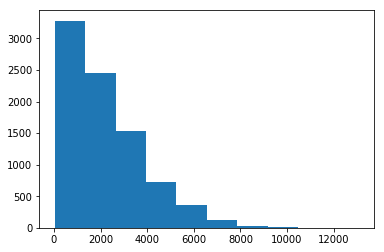

In [10]:
plt.hist(impute_data['Item_Outlet_Sales'])

(array([ 674., 1249., 1639., 1820., 1582.,  950.,  447.,  131.,   27.,
           4.]), array([  5.76974869,  16.6326011 ,  27.4954535 ,  38.3583059 ,
         49.2211583 ,  60.0840107 ,  70.94686311,  81.80971551,
         92.67256791, 103.53542031, 114.39827271]), <a list of 10 Patch objects>)

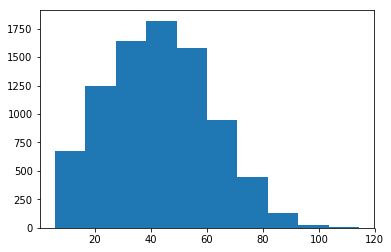

In [11]:
plt.hist(np.sqrt(impute_data['Item_Outlet_Sales']))

In [12]:
impute_data.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.015205,0.024756,-0.008301,0.003229,0.004088,0.001994,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.092460,0.006063,0.003151,-0.003103,-0.001598,-0.001050,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.036268,-0.001315,-0.074834,0.049712,-0.028099,0.124445,-0.128625
Item_Type,0.015205,-0.092460,-0.036268,1.000000,-0.025766,-0.001473,0.004792,0.006250,0.007103,-0.013054
Item_MRP,0.024756,0.006063,-0.001315,-0.025766,1.000000,0.005020,0.010810,0.000232,-0.007488,0.567574
Outlet_Establishment_Year,-0.008301,0.003151,-0.074834,-0.001473,0.005020,1.000000,-0.217519,-0.089216,-0.515161,-0.049135
Outlet_Size,0.003229,-0.003103,0.049712,0.004792,0.010810,-0.217519,1.000000,-0.429200,-0.230020,-0.091442
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.006250,0.000232,-0.089216,-0.429200,1.000000,0.424745,0.089367
Outlet_Type,0.001994,-0.001050,0.124445,0.007103,-0.007488,-0.515161,-0.230020,0.424745,1.000000,0.005331
Item_Outlet_Sales,0.011550,0.018719,-0.128625,-0.013054,0.567574,-0.049135,-0.091442,0.089367,0.005331,1.000000


In [13]:
def lm_model(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
    scaler = MinMaxScaler(feature_range=(0, 1))
    x_train_scaled = scaler.fit_transform(x_train)
    x_train = pd.DataFrame(x_train_scaled)
    x_test_scaled = scaler.fit_transform(x_test)
    x_test = pd.DataFrame(x_test_scaled)
    lm=LinearRegression()
    lm=lm.fit(x_train,y_train)
    print('intercept:',lm.intercept_[0])
    print('coefficient:',lm.coef_[0])
    y_pred =lm.predict(x_test)
    r_sqr =r2_score(y_test,y_pred)
    print("R square :",r_sqr)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print("rmse:",rmse)
    return y_test,y_pred   

In [14]:
X=impute_data[['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility', 
 'Item_MRP',
  'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']] #'Item_Type','Outlet_Establishment_Year',
Y=np.sqrt(impute_data[[ 'Item_Outlet_Sales']])

intercept: 27.938423849442493
coefficient: [ -0.16119216   0.80076725 -16.7363246   38.74331494   0.60317483
  -3.48023633   4.31331435  -6.27380493]
R square : 0.3890693547561497
rmse: 14.37981479734829


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


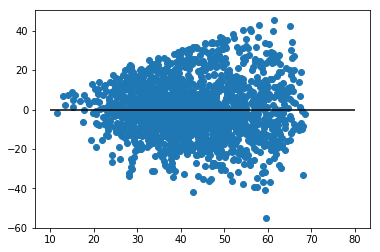

In [15]:
ytest,ypred=lm_model(X,Y)
plt.scatter(ypred,ypred-ytest)
plt.hlines(y=0,xmin=10,xmax=80)

with columns : Item_Weight , Item_Outlet_Sales
intercept: 42.241334171180455
coefficient: [1.29220311]
R square : -0.0012113245115747961
rmse: 18.408576810189334


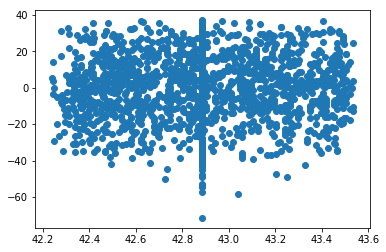

--------------------------------------
with columns : Item_Fat_Content , Item_Outlet_Sales
intercept: 42.67677058265396
coefficient: [0.57502169]
R square : 0.00026764297228809575
rmse: 18.394975411768346


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


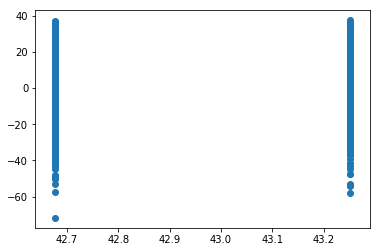

--------------------------------------
with columns : Item_Visibility , Item_Outlet_Sales
intercept: 46.752143559718576
coefficient: [-19.19273474]
R square : 0.02220112750690706
rmse: 18.192069371558002


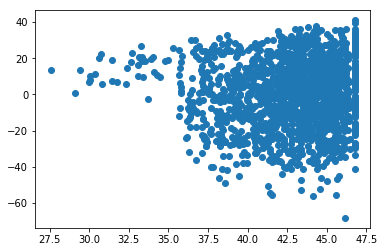

--------------------------------------
with columns : Item_MRP , Item_Outlet_Sales
intercept: 24.959013950746968
coefficient: [38.63584009]
R square : 0.3517508412154926
rmse: 14.812498463352071


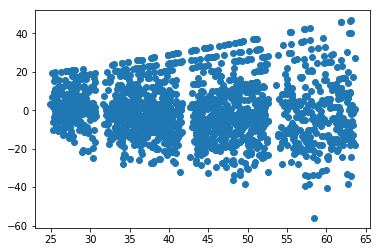

--------------------------------------
with columns : Item_Type , Item_Outlet_Sales
intercept: 42.85125057643594
coefficient: [0.04720684]
R square : -0.00037722007980645067
rmse: 18.400907163215876


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


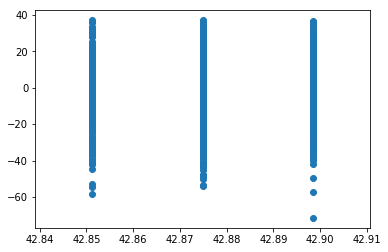

--------------------------------------
with columns : Outlet_Size , Item_Outlet_Sales
intercept: 44.16100828278843
coefficient: [-3.84127717]
R square : 0.012951171299250275
rmse: 18.277915116330256


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


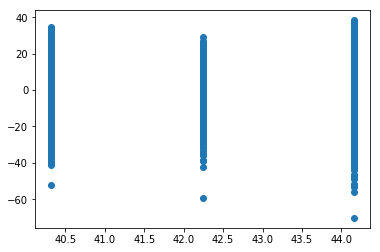

--------------------------------------
with columns : Outlet_Location_Type , Item_Outlet_Sales
intercept: 40.78647570589541
coefficient: [3.74407178]
R square : 0.0017680773426531626
rmse: 18.381166307324925


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


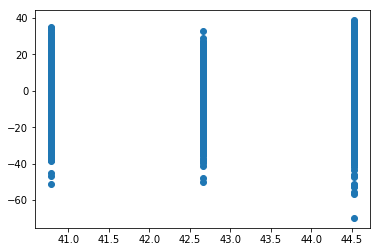

--------------------------------------
with columns : Outlet_Type , Item_Outlet_Sales
intercept: 43.88642518748972
coefficient: [-4.32145878]
R square : 0.006571517837340224
rmse: 18.336888365475218


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


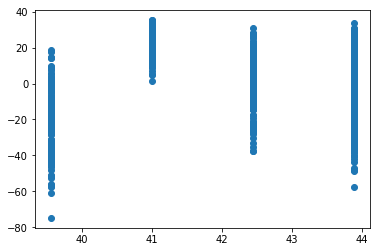

--------------------------------------


In [16]:
for i in X:
    print('with columns :',i,',','Item_Outlet_Sales' )
    ytest,ypred=lm_model(impute_data[[i]],Y)
    plt.scatter(ypred,ypred-ytest)
    #plt.hlines(y=0,xmin=10,xmax=80)
    plt.show()
    print('--------------------------------------')

- From the above regression graph error is normally distributed in the Item_MRP and R Square = 0.3517

 - 1)Fitting model using : 'Item_Weight','Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Visibility',  'Item_MRP',  'Item_Type', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type'

intercept: 32.72748047660369
coefficient: [ -0.25456315  -6.39559742   0.80937462 -16.44372722  38.79833266
   0.6449927   -5.27613125   4.37965621 -10.08610589]
R square : 0.40209248212521387
rmse: 14.22572288412448


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


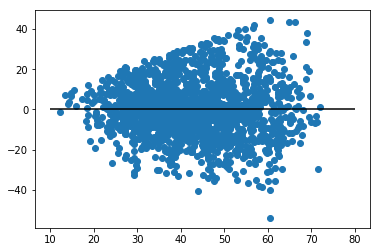

In [17]:
#X = train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Location_Type1','Item_Fat_Content1','Outlet_Size1','Outlet_Type1']]
X=impute_data[['Item_Weight','Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Visibility',  'Item_MRP',  'Item_Type', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type']] #'Item_Type','Outlet_Establishment_Year',
Y=np.sqrt(impute_data[[ 'Item_Outlet_Sales']])
ytest,ypred = lm_model(X,Y)
#residual plot
plt.scatter(ypred,ypred-ytest)
plt.hlines(y=0,xmin=10,xmax=80)

- 2)using columns: 'Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility',  'Item_MRP',  'Item_Type', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type'

intercept: 32.602689975136514
coefficient: [ -6.39246746   0.81274577 -16.43954449  38.78999431   0.64230613
  -5.27502282   4.38009886 -10.08496771]
R square : 0.4020240672597265
rmse: 14.226536741660388


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


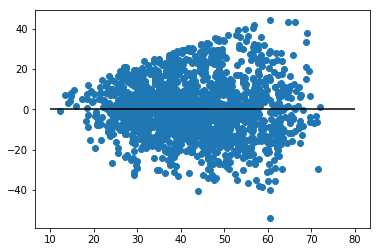

In [18]:
X=impute_data[['Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility',  'Item_MRP',  'Item_Type', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type']] #'Item_Type','Outlet_Establishment_Year',
Y=np.sqrt(impute_data[[ 'Item_Outlet_Sales']])
ytest,ypred = lm_model(X,Y)
#residual plot
plt.scatter(ypred,ypred-ytest)
plt.hlines(y=0,xmin=10,xmax=80)

- 3)Fitting the model using 'Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility',  'Item_MRP',  'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type'

intercept: 33.0126721219114
coefficient: [ -6.38621783   0.77126625 -16.48428525  38.77169588  -5.27475007
   4.37463134 -10.07214281]
R square : 0.4025178763598295
rmse: 14.220661384582229


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


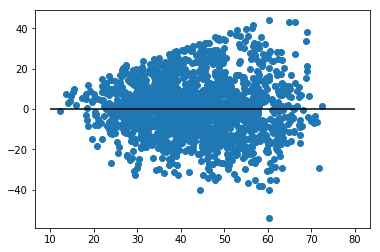

In [19]:
X=impute_data[['Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility',  'Item_MRP',  'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type']] #'Item_Type','Outlet_Establishment_Year',
Y=np.sqrt(impute_data[[ 'Item_Outlet_Sales']])
ytest,ypred = lm_model(X,Y)
#residual plot
plt.scatter(ypred,ypred-ytest)
plt.hlines(y=0,xmin=10,xmax=80)

- 4)Fitting the model using 'Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility',  'Item_MRP',  'Outlet_Size',
'Outlet_Location_Type'

intercept: 28.97477858838514
coefficient: [ -0.92980799   0.76874925 -18.87574851  38.77157981  -3.39599319
   1.94577547]
R square : 0.3818123456735866
rmse: 14.464968797954523


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


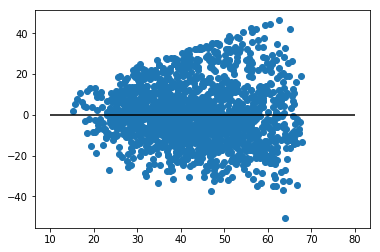

In [20]:
X=impute_data[['Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type']] #'Item_Type','Outlet_Establishment_Year',
Y=np.sqrt(impute_data[[ 'Item_Outlet_Sales']])
ytest,ypred = lm_model(X,Y)
#residual plot
plt.scatter(ypred,ypred-ytest)
plt.hlines(y=0,xmin=10,xmax=80)

intercept: 28.97477858838514
coefficient: [ -0.92980799   0.76874925 -18.87574851  38.77157981  -3.39599319
   1.94577547]
R square : 0.3818123456735866
rmse: 14.464968797954523


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


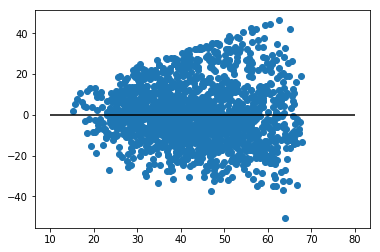

In [21]:
X=impute_data[['Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility',  'Item_MRP',  'Outlet_Size',
'Outlet_Location_Type']] #'Item_Type','Outlet_Establishment_Year',
Y=np.sqrt(impute_data[[ 'Item_Outlet_Sales']])
ytest,ypred = lm_model(X,Y)
#residual plot
plt.scatter(ypred,ypred-ytest)
plt.hlines(y=0,xmin=10,xmax=80)

- 1) with usign columns : 'Item_Weight','Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Visibility',  'Item_MRP',  'Item_Type', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type'
    - R square : 0.40209248212521387
    - rmse: 14.22572288412448
    
- 2) using columns: 'Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
    - R square : 0.4020240672597265
    - rmse: 14.226536741660388
* Best Model:    
- 3) using columns: 'Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
    - R square : 0.4025178763598295
    - rmse: 14.220661384582229

- 4) using columns: 'Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility',  'Item_MRP',  'Outlet_Size',
'Outlet_Location_Type'

    - R square : 0.3818123456735866
    - rmse: 14.230415644228154
    

# Predicting using Best Model

In [22]:
test=pd.read_csv('test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [23]:
test=test[['Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
test.head()

,Outlet_Establishment_Year,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1999,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1
1,2007,reg,0.038428,87.3198,NaN,Tier 2,Supermarket Type1
2,1998,Low Fat,0.099575,241.7538,NaN,Tier 3,Grocery Store
3,2007,Low Fat,0.015388,155.0340,NaN,Tier 2,Supermarket Type1
4,1985,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3


In [24]:
null_test=test.isnull()
(null_test/len(test)).sum()*100

Outlet_Establishment_Year     0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_MRP                      0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [25]:
Outlet_Size_mode_test=test['Outlet_Size'].mode()
test['Outlet_Size'].fillna(Outlet_Size_mode_test[0],inplace=True)
miss=test.isnull().sum()
(miss/len(test))*100

Outlet_Establishment_Year    0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_MRP                     0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

In [26]:
map2= {'Low Fat':0,'low fat':0,'LF':0,'Regular':1,'reg':1}
map3={'Medium':0, 'High':1, 'Small':2}
map4={'Tier 1':0, 'Tier 3':2, 'Tier 2':1}
map5={'Supermarket Type1':0, 'Supermarket Type2':1, 'Grocery Store':2,'Supermarket Type3':3}
map6={'Drinks':1, 'Food':2, 'Others':3}
test_impute=test.replace({'Item_Fat_Content':map2,'Outlet_Size':map3,'Outlet_Location_Type':map4,'Outlet_Type':map5})#,'Item_Type':map6 
test_impute.head()

,Outlet_Establishment_Year,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1999,0,0.007565,107.8622,0,0,0
1,2007,1,0.038428,87.3198,0,1,0
2,1998,0,0.099575,241.7538,0,2,2
3,2007,0,0.015388,155.0340,0,1,0
4,1985,1,0.118599,234.2300,0,2,3


In [27]:
X_test=impute_data[['Outlet_Establishment_Year','Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
 #'Item_Type','Outlet_Establishment_Year',
Y_test=np.sqrt(impute_data[[ 'Item_Outlet_Sales']])

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X_test,Y_test,test_size=0.2,random_state=42)
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)
lm=LinearRegression()
lm=lm.fit(x_train,y_train)
print('intercept:',lm.intercept_[0])
print('coefficient:',lm.coef_[0])
y_pred =lm.predict(test_impute)
test['predicted_sales']=np.sqrt((y_pred)**2)

intercept: 33.75438376301447
coefficient: [ -7.1944414    0.70522355 -17.13552867  39.01399929  -5.47637452
   4.26242014 -10.37921589]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
predicted_sales=test.to_csv('predicted_sales.csv')

In [48]:
len(test_impute)

5681

In [49]:
len(train_data)

8523

In [ ]:
r_sqr =r2_score(y_test,y_pred)
    print("R square :",r_sqr)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print("rmse:",rmse)
    return y_test,y_pred   